## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Copy, paste and modify the python code file in the notebook

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 13.2 MB/s eta 0:00:0000:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 17.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 43.5 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=df76fa158dd9d9c8e73333059e27ee6eb869841bfb08e285adc8901c28797792
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

# Step 2: Authentication for Twitter API

In [3]:
# Authentication
consumerKey = "xxxhfgdykOK5Xx224leXIgkxxxx"
consumerSecret = "sjdjilCbjbGF0FoodhaesljksksBv4Tksjhjhfkhs"
accessToken = "196698883-0ZbttcgbDRelWtPD3Psm14mChshfjshf"
accessTokenSecret = "kjksfkjfID6KUJ7Bh2n2jMetynkjfkjff"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [4]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []



for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  100


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  18
negative number:  21
neutral number:  61


In [ ]:
tweet_list

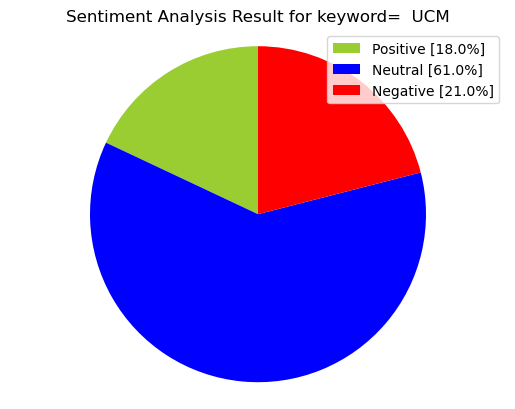

In [6]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [8]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"#GuardiansOfTheGalaxyVol3 es una hermosa, conm...","#GuardiansOfTheGalaxyVol3 es una hermosa, conm..."
1,consegue nos emocionar de uma forma perfeita e...,consegue nos emocionar de uma forma perfeita e...
2,Muy chimba #GuardianesdelaGalaxiaVol3 \n\nLást...,Muy chimba #GuardianesdelaGalaxiaVol3 \n\nLást...
3,#CubaViveEnSuHistoria #FidelPorSiempre #ALaPa...,#CubaViveEnSuHistoria #FidelPorSiempre #ALaPa...
4,RT @MarvelLatin: #GuardiansOfTheGalaxyVol3 es ...,RT @MarvelLatin: #GuardiansOfTheGalaxyVol3 es ...
...,...,...
93,@nk_ucm よくハードワークしたねいいことじゃん\n大正解！,@nk_ucm よくハードワークしたねいいことじゃん\n大正解！
94,RT @JL_MarceloP: Industria biofarmacéutica en ...,RT @JL_MarceloP: Industria biofarmacéutica en ...
95,@mssiahnista https://t.co/a8sJhrmmzh,@mssiahnista https://t.co/a8sJhrmmzh
97,RT @Peli_Comic: El UCM empezó hace 15 años. Yo...,RT @Peli_Comic: El UCM empezó hace 15 años. Yo...


In [9]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"#GuardiansOfTheGalaxyVol3 es una hermosa, conm...",guardiansofthegalaxyvol3 es una hermosa conm...
1,consegue nos emocionar de uma forma perfeita e...,consegue nos emocionar de uma forma perfeita e...
2,Muy chimba #GuardianesdelaGalaxiaVol3 \n\nLást...,muy chimba guardianesdelagalaxiavol3 l stim...
3,#CubaViveEnSuHistoria #FidelPorSiempre #ALaPa...,cubaviveensuhistoria fidelporsiempre alapa...
4,RT @MarvelLatin: #GuardiansOfTheGalaxyVol3 es ...,guardiansofthegalaxyvol3 es un gran hermoso...
6,El desarrollo de personaje de Rocket es el mas...,el desarrollo de personaje de rocket es el mas...
7,RT @Electroalces: Guardianes de la Galaxia Vol...,guardianes de la galaxia vol 3 es una pel cu...
8,Ayyy sí ta bonita la de Guardians 3.\n\nY psss...,ayyy s ta bonita la de guardians 3 y pssss ...
9,Que brutalidad de película es #GuardiansOfTheG...,que brutalidad de pel cula es guardiansoftheg...
10,Las primeras dos temporadas de Flash son mejor...,las primeras dos temporadas de flash son mejor...


In [10]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_27028/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"#GuardiansOfTheGalaxyVol3 es una hermosa, conm...",guardiansofthegalaxyvol3 es una hermosa conm...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
1,consegue nos emocionar de uma forma perfeita e...,consegue nos emocionar de uma forma perfeita e...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
2,Muy chimba #GuardianesdelaGalaxiaVol3 \n\nLást...,muy chimba guardianesdelagalaxiavol3 l stim...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
3,#CubaViveEnSuHistoria #FidelPorSiempre #ALaPa...,cubaviveensuhistoria fidelporsiempre alapa...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
4,RT @MarvelLatin: #GuardiansOfTheGalaxyVol3 es ...,guardiansofthegalaxyvol3 es un gran hermoso...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
6,El desarrollo de personaje de Rocket es el mas...,el desarrollo de personaje de rocket es el mas...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
7,RT @Electroalces: Guardianes de la Galaxia Vol...,guardianes de la galaxia vol 3 es una pel cu...,0.0,0.0,neutral,0.000,1.000,0.000,0.000
8,Ayyy sí ta bonita la de Guardians 3.\n\nY psss...,ayyy s ta bonita la de guardians 3 y pssss ...,0.0,0.0,negative,0.095,0.905,0.000,-0.296
9,Que brutalidad de película es #GuardiansOfTheG...,que brutalidad de pel cula es guardiansoftheg...,0.0,0.0,positive,0.000,0.888,0.112,0.340
10,Las primeras dos temporadas de Flash son mejor...,las primeras dos temporadas de flash son mejor...,0.0,0.0,negative,0.121,0.879,0.000,-0.296


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,45,52.33
positive,22,25.58
negative,19,22.09


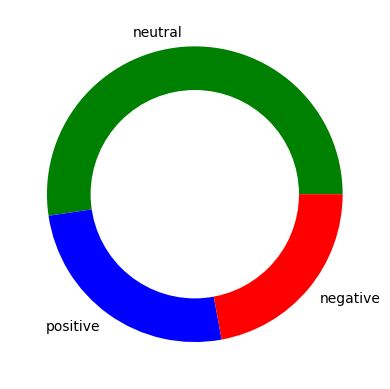

In [15]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



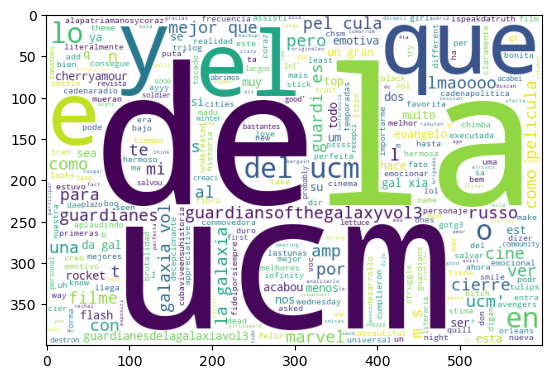

In [17]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

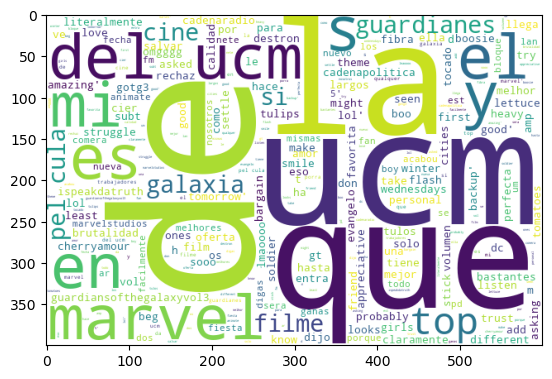

In [18]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

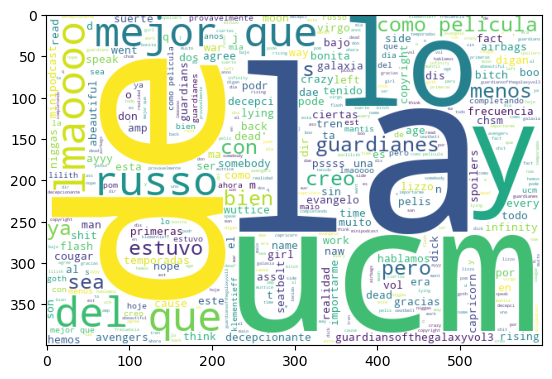

In [19]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

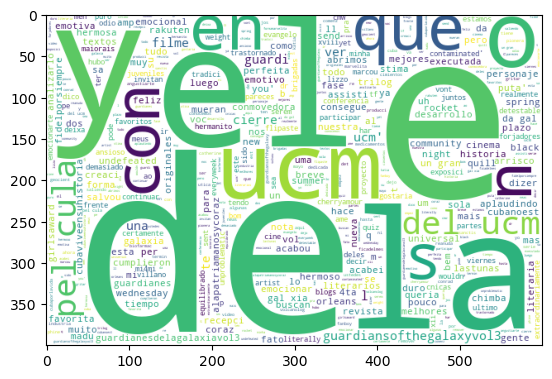

In [20]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)